In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns  

from data.load_data import load_raw_data

In [2]:
df = load_raw_data()

In [3]:
plt.style.use("seaborn-v0_8-whitegrid") 
sns.set_context("notebook")

## **EDA Rules for This Project**

                +  Every plot must answer a business question

                +  No plots “just to see”

                +  Churn is always compared against non-churn

                +  No feature engineering in EDA

                +  Observations must be written in plain business language

In [4]:
churn_counts = df["Churn Label"].value_counts()
churn_percent = df["Churn Label"].value_counts(normalize = True)

churn_counts, churn_percent

(Churn Label
 No     5174
 Yes    1869
 Name: count, dtype: int64,
 Churn Label
 No     0.73463
 Yes    0.26537
 Name: proportion, dtype: float64)

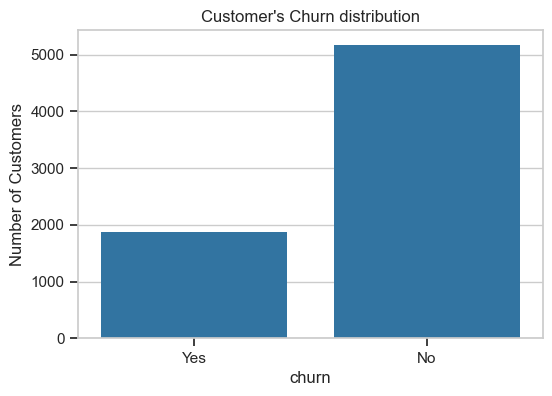

In [5]:
plt.figure(figsize = (6, 4))
sns.countplot(
    data=df,
    x = "Churn Label"
)
plt.title("Customer's Churn distribution")
plt.xlabel("churn")
plt.ylabel("Number of Customers")
plt.show()

#### **Is churn a minority or majority class?**
            - Churn is a minority class, making this an imbalanced classification problem that requires careful selection of evaluation metrics.
            
#### **What does ~26% churn mean for a telecom/SaaS business?**
            - A churn rate of around 26% indicates a serious customer retention issue for a SaaS or telecom company, where even 5–10% churn can significantly impact recurring revenue.

#### **Why accuracy alone would be misleading later?**
            - Accuracy alone can be misleading, because a model that predicts most customers as non-churn may still achieve high accuracy while failing to identify customers who need retention actions.

In [6]:
## tenure months 

df["Tenure Months"].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure Months, dtype: float64

In [7]:
df.groupby(by= "Churn Label")["Tenure Months"].describe()

,count,mean,std,min,25%,50%,75%,max
Churn Label,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


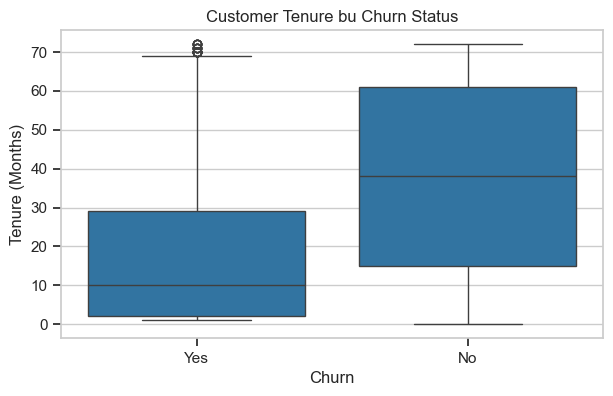

In [8]:
plt.figure(figsize=(7, 4))
sns.boxplot(
    data= df,
    x = "Churn Label",
    y = "Tenure Months"
)

plt.title("Customer Tenure bu Churn Status")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()

##### **Do churned customers generally have lower tenure?**

            - Customers who churn tend to have significantly lower tenure compared to retained customers, indicating that early-stage customers are more vulnerable to leaving.

##### **What does this imply about early-stage customers?**

            - This suggests that the first few months of the customer lifecycle are critical for retention.

##### **How could a business act on this insight?**

            - The business could focus on onboarding improvements, early engagement programs, or targeted retention offers for customers within their first year.

In [10]:
df["Contract"].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [16]:
contract_churn = (
    df.groupby(by = "Contract")["Churn Label"].value_counts(normalize = True).unstack()
)
contract_churn

Churn Label,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


In [17]:
churn_rate_by_contract = contract_churn["Yes"].sort_values(ascending=False)
churn_rate_by_contract


Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Yes, dtype: float64

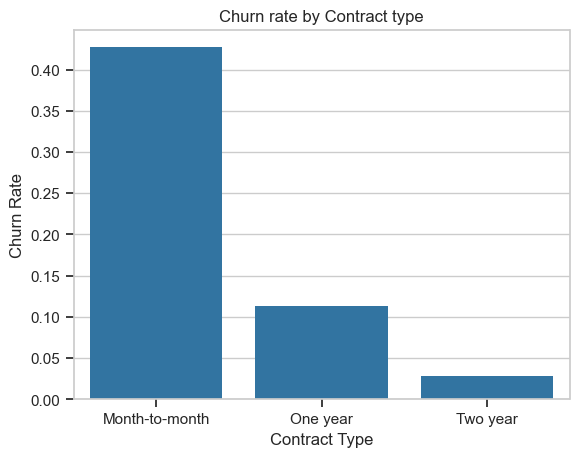

In [21]:
plt.Figure(figsize = (7, 4))
sns.barplot(
    x = churn_rate_by_contract.index,
    y = churn_rate_by_contract.values
)
plt.title("Churn rate by Contract type")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate")
plt.show()

##### **Which contract type has highest churn?**

            = Customers on month-to-month contracts exhibit the highest churn rate compared to one-year and two-year contracts.

##### **Why might that happen (business reasoning, not speculation)?**

            = This suggests that lower commitment and flexibility increase churn risk, as customers can leave without long-term obligations.

##### **What action should the company take?**

            = The company should consider incentivizing customers to move from month-to-month plans to longer-term contracts through discounts, loyalty benefits, or bundled services

In [23]:
df["Monthly Charges"].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: Monthly Charges, dtype: float64

In [26]:
df.groupby(by = "Churn Label")["Monthly Charges"].describe()

,count,mean,std,min,25%,50%,75%,max
Churn Label,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


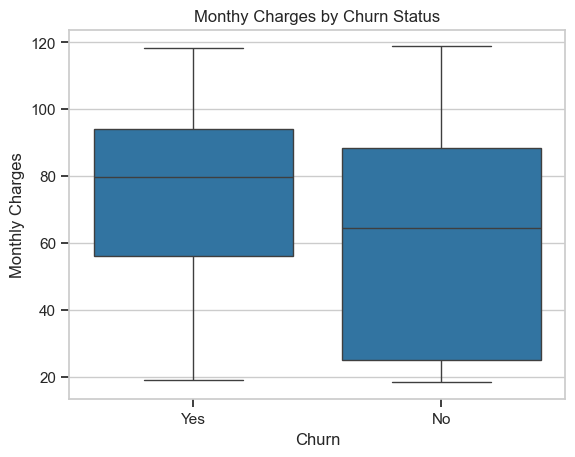

In [28]:
plt.Figure(figsize = (7, 4))
sns.boxplot(
    data = df,
    x = "Churn Label",
    y = "Monthly Charges"
)
plt.title("Monthy Charges by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

##### **Do churned customers generally pay higher monthly charges?**

            - Customers who churn tend to have higher monthly charges compared to retained customers.

##### **What does that imply about price sensitivity?**

            - This suggests that customers paying more may be more sensitive to perceived value or pricing relative to service quality.

##### **What business action could be taken?**

            - The business could explore targeted retention offers, bundled discounts, or value-enhancement strategies for high-paying customers who are at risk.

In [33]:
df.groupby(by = ["Contract", "Churn Label"])["Monthly Charges"].mean().unstack()

Churn Label,No,Yes
Contract,,
Month-to-month,61.462635,73.019396
One year,62.508148,85.050904
Two year,60.012477,86.777083


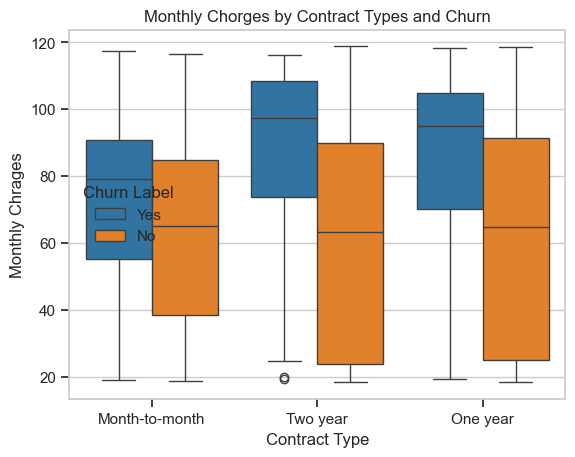

In [44]:
plt.Figure(figsize = (8, 5))
sns.boxplot(
    data = df,
    x = "Contract",
    y = "Monthly Charges",
    hue = "Churn Label"
)
plt.title("Monthly Chorges by Contract Types and Churn")
plt.xlabel("Contract Type")
plt.ylabel("Monthly Chrages")
plt.show()


##### **Where is churn concentrated?**

            - Churn is primarily concentrated among customers on month-to-month contracts.

##### **Are high-paying churners mostly in a specific contract type?**

            - High-paying customers within the month-to-month segment represent the highest revenue-risk group, as they combine low commitment with high monthly charges.

##### **What targeted strategy emerges?**

            - The company should design targeted retention strategies such as discounted long-term contract upgrades, bundled service offers, or loyalty incentives specifically for high-paying month-to-month customers.

In [47]:
df["Tech Support"].value_counts()


Tech Support
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [48]:
tech_support_churn = (
    df.groupby(by = "Tech Support")["Churn Label"]
    .value_counts(normalize=True)
    .unstack()
)

tech_support_churn

Churn Label,No,Yes
Tech Support,,
No,0.583645,0.416355
No internet service,0.925950,0.074050
Yes,0.848337,0.151663


In [49]:
tech_support_churn_rate = tech_support_churn["Yes"].sort_values(ascending= False)
tech_support_churn_rate

Tech Support
No                     0.416355
Yes                    0.151663
No internet service    0.074050
Name: Yes, dtype: float64

##### **Which group churns more?**
            
            - Customers without Tech Support exhibit a significantly higher churn rate compared to those who subscribe to Tech Support.

##### **What does this imply about customer engagement?**

            - This suggests that customers who use support services may feel more supported and engaged, increasing their dependency on the provider.

##### **What business strategy emerges?**

            - The company could proactively promote Tech Support add-ons, especially for new or at-risk customers, as part of a retention strategy.